# IBM Applied Data Science Capstone Course by Coursera
## Vera Rykalina

### 1 Importing  libraries 


In [4]:
import sys
import io
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("All libraries imported!")
#%matplotlib

All libraries imported!


### 2 Wikipage data scrapping 

In [5]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Localities_of_Berlin").text

In [6]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [7]:
# create a list to store localities data
localities = []

In [8]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category mw-category-columns")[0].findAll("li"):
    localities.append(row.text)

In [9]:
# create a new DataFrame from the list
ber_df = pd.DataFrame({"Locality": localities})
ber_df.head(10)

,Locality
0,Boroughs and neighborhoods of Berlin
1,Adlershof
2,Afrikanisches Viertel
3,Alt-Hohenschönhausen
4,Alt-Treptow
5,Altglienicke
6,Baumschulenweg
7,Biesdorf (Berlin)
8,Blankenburg (Berlin)
9,Blankenfelde


In [10]:
ber_df.drop(ber_df.index[[0]], inplace=True)

In [11]:
ber_df.head(6)

,Locality
1,Adlershof
2,Afrikanisches Viertel
3,Alt-Hohenschönhausen
4,Alt-Treptow
5,Altglienicke
6,Baumschulenweg


In [12]:
ber_df.reset_index(drop=True, inplace=True)

In [13]:
ber_df.columns

Index(['Locality'], dtype='object')

In [14]:
type(ber_df)

pandas.core.frame.DataFrame

In [15]:
ber_df.shape

(98, 1)

### 3 Getting geographical coordinates

In [16]:
# define a function to get coordinates
def get_latlng(locality):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Berlin, Germany'.format(locality))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [17]:
# Call the function to get the coordinates, store in a new list using list comprehension
coordinates = [ get_latlng(locality) for locality in ber_df["Locality"].tolist()]

In [18]:
print(coordinates[:3])
print(len(coordinates))

[[52.437790000000064, 13.547780000000046], [52.556812901451046, 13.334729616371035], [52.547060000000045, 13.500550000000032]]
98


In [19]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
ber_df_coor = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

In [20]:
print(ber_df_coor.head())
print(ber_df.shape)

    Latitude  Longitude
0  52.437790   13.54778
1  52.556813   13.33473
2  52.547060   13.50055
3  52.493500   13.45711
4  52.420060   13.53969
(98, 1)


In [21]:
# merge the coordinates into the original dataframe
ber_df['Latitude'] = ber_df_coor['Latitude']
ber_df['Longitude'] = ber_df_coor['Longitude']

In [22]:
# check the neighborhoods and the coordinates
print(ber_df.shape)
ber_df

(98, 3)


,Locality,Latitude,Longitude
0,Adlershof,52.437790,13.54778
1,Afrikanisches Viertel,52.556813,13.33473
2,Alt-Hohenschönhausen,52.547060,13.50055
3,Alt-Treptow,52.493500,13.45711
4,Altglienicke,52.420060,13.53969
5,Baumschulenweg,52.466770,13.48850
6,Biesdorf (Berlin),52.510040,13.55374
7,Blankenburg (Berlin),52.593320,13.45805
8,Blankenfelde,52.618550,13.39017
9,Bohnsdorf,52.401090,13.56057


In [23]:
# save the DataFrame as CSV file
ber_df.to_csv("berlin.csv", index=False)


### 4 Creating a map of Berlin with localities

In [24]:
# get the coordinates of Berlin
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="verarykalina@gmail.com")
#geolocator = Nominatim(geopy.geocoders.options.default_user_agent)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geograpical coordinate of Berlin, Germany {}, {}.".format(latitude, longitude))

The geograpical coordinate of Berlin, Germany 52.5186925, 13.3996024.


In [25]:
# create map of Berlin using latitude and longitude values
map_ber = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
    label = '{}'.format(locality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#ff00ff',
        fill_opacity=0.7).add_to(map_ber)  
    
map_ber

In [26]:
# save the map as HTML file
map_ber.save('map_ber.html')

### 5 Visualizing features of localities

In [27]:
df1 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[2]
df1[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df2 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[3]
df2[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df3 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[4]
df3[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df4 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[5]
df4[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df5 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[6]
df5[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df6 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[7]
df6[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df7 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[8]
df7[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df8 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[9]
df8[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df9 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[10]
df9[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df10 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[11]
df10[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df11 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[12]
df11[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df12 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[13]
df12[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]


,Locality,Area in km2,Population as of 2008,Density inhabitants per km2
0,(1201) Reinickendorf,10.50,72859,6939
1,(1202) Tegel,33.70,33417,992
2,(1203) Konradshöhe,2.20,5997,2726
3,(1204) Heiligensee,10.70,17641,1649
4,(1205) Frohnau,7.80,17025,2183
5,(1206) Hermsdorf,6.10,16503,2705
6,(1207) Waidmannslust,2.30,10022,4357
7,(1208) Lübars,5.00,4915,983
8,(1209) Wittenau,5.87,22696,3866
9,(1210) Märkisches Viertel,3.20,35206,11002


In [28]:
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
locality_data = pd.concat(dataframes)
locality_data.reset_index(drop=True, inplace=True)

In [29]:
locality_list=[]
for i in locality_data["Locality"]:
    i=i[6:]
    print(i)    
    locality_list.append(i)
    
locality_clean=pd.DataFrame({"Locality": locality_list})
locality_data["Locality"]=locality_clean['Locality']
locality_data.columns

 Mitte
 Moabit
 Hansaviertel
 Tiergarten
 Wedding
 Gesundbrunnen
 Friedrichshain
 Kreuzberg
 Prenzlauer Berg
 Weißensee
 Blankenburg
 Heinersdorf
 Karow
 Stadtrandsiedlung Malchow
 Pankow
 Blankenfelde
 Buch
 Französisch Buchholz
 Niederschönhausen
 Rosenthal
 Wilhelmsruh
 Charlottenburg
 Wilmersdorf
 Schmargendorf
 Grunewald
 Westend
 Charlottenburg-Nord
 Halensee
 Spandau
 Haselhorst
 Siemensstadt
 Staaken
 Gatow
 Kladow
 Hakenfelde
 Falkenhagener Feld
 Wilhelmstadt
 Steglitz
 Lichterfelde
 Lankwitz
 Zehlendorf
 Dahlem
 Nikolassee
 Wannsee
 Schöneberg
 Friedenau
 Tempelhof
 Mariendorf
 Marienfelde
 Lichtenrade
 Neukölln
 Britz
 Buckow
 Rudow
 Gropiusstadt
 Alt-Treptow
 Plänterwald
 Baumschulenweg
 Johannisthal
 Niederschöneweide
 Altglienicke
 Adlershof
 Bohnsdorf
 Oberschöneweide
 Köpenick
 Friedrichshagen
 Rahnsdorf
 Grünau
 Müggelheim
 Schmöckwitz
 Marzahn
 Biesdorf
 Kaulsdorf
 Mahlsdorf
 Hellersdorf
 Friedrichsfelde
 Karlshorst
 Lichtenberg
 Falkenberg
 Malchow
 Wartenberg
 Neu-H

Index(['Locality', 'Area in km2', 'Population as of 2008',
       'Density inhabitants per km2', 'Map'],
      dtype='object')

In [30]:
locality_data.drop('Map', axis=1, inplace=True)
locality_data.head(10)

,Locality,Area in km2,Population as of 2008,Density inhabitants per km2
0,Mitte,10.70,79582,7445
1,Moabit,7.72,69425,8993
2,Hansaviertel,0.53,5889,11111
3,Tiergarten,5.17,12486,2415
4,Wedding,9.23,76363,8273
5,Gesundbrunnen,6.13,82729,13496
6,Friedrichshain,9.78,114050,11662
7,Kreuzberg,10.40,147227,14184
8,Prenzlauer Berg,11.00,142319,12991
9,Weißensee,7.93,45485,5736


In [31]:
# merge the coordinates into the original dataframe
locality_data['Latitude'] = ber_df_coor['Latitude']
locality_data['Longitude'] = ber_df_coor['Longitude']
locality_data.head()

,Locality,Area in km2,Population as of 2008,Density inhabitants per km2,Latitude,Longitude
0,Mitte,10.70,79582,7445,52.437790,13.54778
1,Moabit,7.72,69425,8993,52.556813,13.33473
2,Hansaviertel,0.53,5889,11111,52.547060,13.50055
3,Tiergarten,5.17,12486,2415,52.493500,13.45711
4,Wedding,9.23,76363,8273,52.420060,13.53969


In [32]:
locality_data.sort_values(by=['Density inhabitants per km2', 'Area in km2'], ascending=False, inplace=True)
locality_sorted=locality_data.head(20)
locality_sorted

,Locality,Area in km2,Population as of 2008,Density inhabitants per km2,Latitude,Longitude
45,Friedenau,1.65,26736,16204,52.443410,13.58325
83,Fennpfuhl,2.12,30932,14591,52.457840,13.31808
7,Kreuzberg,10.40,147227,14184,52.593320,13.45805
5,Gesundbrunnen,6.13,82729,13496,52.466770,13.48850
54,Gropiusstadt,2.66,35844,13475,52.438550,13.38779
50,Neukölln,11.70,154127,13173,52.432930,13.31894
8,Prenzlauer Berg,11.00,142319,12991,52.618550,13.39017
22,Wilmersdorf,7.16,92815,12963,52.505270,13.51326
6,Friedrichshain,9.78,114050,11662,52.510040,13.55374
21,Charlottenburg,10.60,118704,11198,52.472970,13.33269


In [33]:
locality_sorted.reset_index(drop=True, inplace=True)

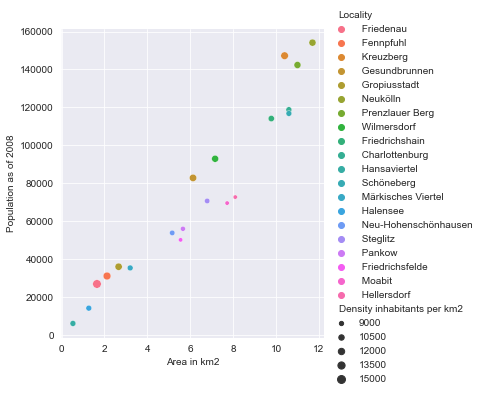

In [34]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.relplot(x="Area in km2", y="Population as of 2008", data=locality_sorted, kind="scatter", hue="Locality", size="Density inhabitants per km2")
plt.savefig("Population", dpi=240)
plt.show()


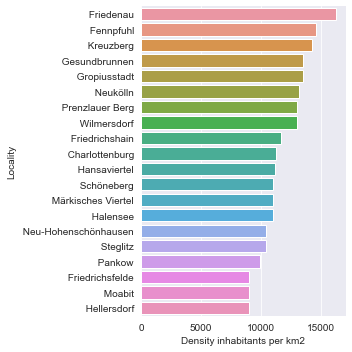

<Figure size 432x288 with 0 Axes>

In [35]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.catplot(y="Locality", x="Density inhabitants per km2", data=locality_sorted, kind="bar")
plt.show()
plt.savefig("Density", dpi=300)

### 6 Using the Foursquare API to explore the localities

In [72]:
import getpass  
CLIENT_SECRET = getpass.getpass()  
#print(CLIENT_SECRET)


········


In [73]:

CLIENT_ID = '2HPNYCXJHXXMYHZ1MHPCURQXBLEZDCWG2B2P3X0HRS1MW45E' # your Foursquare ID
#CLIENT_SECRET = 
VERSION = '20191227'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2HPNYCXJHXXMYHZ1MHPCURQXBLEZDCWG2B2P3X0HRS1MW45E


####  Select top 100 venues that are within a radius of 1000 meters

In [43]:
radius = 1000
LIMIT = 100


def getNearbyVenues(Latitude, Longitude, Locality, radius=1000):
    venues = []

    for lat, long, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
        # create the API request URL
     url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
     results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
        locality,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
        
    
    
    venue_df = pd.DataFrame([item for venue in venues for item in venue])
    venues_df.columns = ['Locality', 'Latitude', 'Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    
    
    
    return(venues_df)
    


In [44]:
radius = 1000
LIMIT = 100

venues = []

for lat, long, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    results = requests.get(url).json()["response"]['groups'][0]['items'] # make the GET request
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            locality,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))  

In [45]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Locality', 'Latitude', 'Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']

print(venues_df.shape)
venues_df.head(10)

(3556, 7)


,Locality,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Adlershof,52.43779,13.54778,Mia Toscana,52.438327,13.549573,Italian Restaurant
1,Adlershof,52.43779,13.54778,Griechisches Restaurant Athen,52.434901,13.546680,Greek Restaurant
2,Adlershof,52.43779,13.54778,Olympia Greek Food,52.433982,13.538500,Greek Restaurant
3,Adlershof,52.43779,13.54778,Trattoria Il Mondo,52.434788,13.543176,Trattoria/Osteria
4,Adlershof,52.43779,13.54778,dm-drogerie markt,52.437625,13.547692,Drugstore
5,Adlershof,52.43779,13.54778,REWE,52.437855,13.545603,Supermarket
6,Adlershof,52.43779,13.54778,EDEKA,52.438345,13.548332,Supermarket
7,Adlershof,52.43779,13.54778,McFIT,52.430956,13.549099,Gym / Fitness Center
8,Adlershof,52.43779,13.54778,Lidl,52.431322,13.548144,Supermarket
9,Adlershof,52.43779,13.54778,Posadas Steakhouse Bar,52.439702,13.553226,Steakhouse


In [48]:
# ber_5_local_venues = getNearbyVenues(Locality=locality_data['Locality'],
#                                    Latitude=locality_data['Latitude'],
#                                    Longitude=locality_data['Longitude']
#                                   )

In [49]:
venues_df.groupby(["Locality"]).count()
#venues_df.value_counts()

,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Adlershof,23,23,23,23,23,23
Afrikanisches Viertel,49,49,49,49,49,49
Alt-Hohenschönhausen,45,45,45,45,45,45
Alt-Treptow,71,71,71,71,71,71
Altglienicke,10,10,10,10,10,10
Baumschulenweg,31,31,31,31,31,31
Biesdorf (Berlin),18,18,18,18,18,18
Blankenburg (Berlin),8,8,8,8,8,8
Blankenfelde,6,6,6,6,6,6


#### Finding out unique venues

In [50]:
print('There are {} uniques categories.'.format(len(venues_df['Venue Category'].unique())))

There are 339 uniques categories.


In [51]:
# print out the list of categories
venues_df['Venue Category'].unique()[:10]

array(['Italian Restaurant', 'Greek Restaurant', 'Trattoria/Osteria',
       'Drugstore', 'Supermarket', 'Gym / Fitness Center', 'Steakhouse',
       'Tanning Salon', 'Pizza Place', 'Asian Restaurant'], dtype=object)

In [52]:
print (venues_df['Venue Category'].value_counts())

Supermarket                                 276
Café                                        198
Italian Restaurant                          141
Bakery                                      110
Bus Stop                                     94
Hotel                                        93
Drugstore                                    85
German Restaurant                            79
Park                                         76
Bar                                          71
Ice Cream Shop                               69
Coffee Shop                                  65
Restaurant                                   51
Tram Station                                 47
Plaza                                        45
Playground                                   43
Pizza Place                                  43
Gym / Fitness Center                         39
Vietnamese Restaurant                        37
Trattoria/Osteria                            34
Organic Grocery                         

In [53]:
# check if the result contains any yoga studio
"Gym / Fitness Center" in venues_df['Venue Category'].unique()

True

In [54]:
# create a dataframe of top 15 categories
venues_df_top15 = venues_df['Venue Category'].value_counts()[0:15].to_frame(name='frequency')
venues_df_top15=venues_df_top15.reset_index()
venues_df_top15.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
venues_df_top15

,Venue Category,Frequency
0,Supermarket,276
1,Café,198
2,Italian Restaurant,141
3,Bakery,110
4,Bus Stop,94
5,Hotel,93
6,Drugstore,85
7,German Restaurant,79
8,Park,76
9,Bar,71


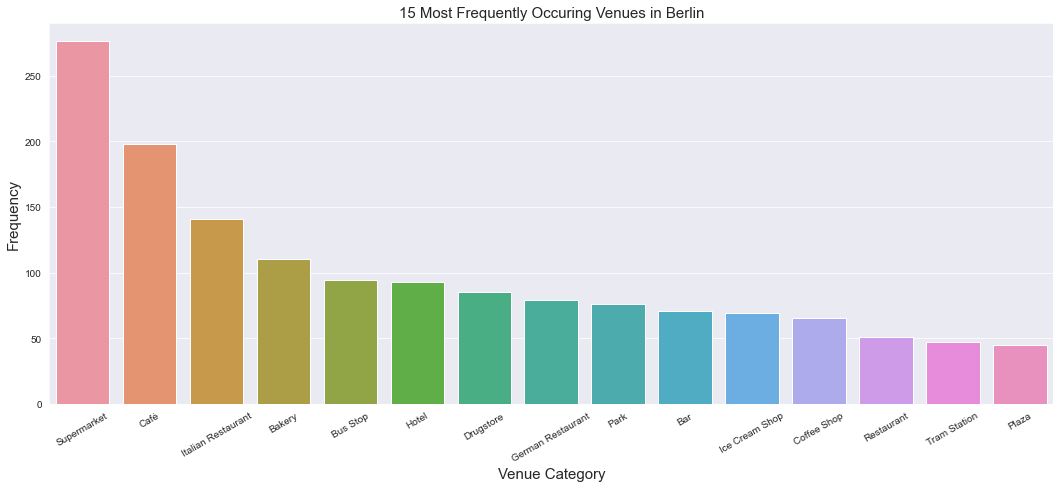

In [55]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=venues_df_top15)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('15 Most Frequently Occuring Venues in Berlin', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

### 7 Analyzing each locality

In [56]:
# one hot encoding
ber_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

# add locality column to the dataframe
ber_onehot['Locality'] = venues_df['Locality'] 

# move locality column to the first column
fixed_columns = [ber_onehot.columns[-1]] + list(ber_onehot.columns[:-1])
ber_onehot = ber_onehot[fixed_columns]


#### Groupping the rows by locality and by taking the mean of the frequency of occurrence of each category

In [57]:
ber_grouped = ber_onehot.groupby(["Locality"]).mean().reset_index()
ber_grouped.index = np.arange(1, len(ber_grouped)+1)
print(ber_grouped.shape)
ber_grouped


(98, 340)


,Locality,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bathing Area,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,College Cafeteria,College Gym,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Credit Union,Creperie,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dive Shop,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pide Place,Pier,Piercing Parlor,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Schnitzel Restaurant,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restauran

#### Creating a new data frame for a yoga studio

In [58]:
ber_yoga = ber_grouped[["Locality","Gym / Fitness Center"]]
ber_yoga.head()

,Locality,Gym / Fitness Center
1,Adlershof,0.043478
2,Afrikanisches Viertel,0.000000
3,Alt-Hohenschönhausen,0.000000
4,Alt-Treptow,0.014085
5,Altglienicke,0.000000


### 8 Clustering localities
#### Running k-means algorithm to cluster the localities in Berlin into 3 clusters

In [59]:
# set number of clusters
kclusters = 3

ber_clustering = ber_yoga.drop(["Locality"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ber_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

/Users/vera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


array([2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [60]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each locality
ber_merged = ber_yoga.copy()

# add clustering labels
ber_merged["Cluster Labels"] = kmeans.labels_
ber_merged.head(20)

,Locality,Gym / Fitness Center,Cluster Labels
1,Adlershof,0.043478,2
2,Afrikanisches Viertel,0.000000,0
3,Alt-Hohenschönhausen,0.000000,0
4,Alt-Treptow,0.014085,0
5,Altglienicke,0.000000,0
6,Baumschulenweg,0.032258,2
7,Biesdorf (Berlin),0.055556,1
8,Blankenburg (Berlin),0.000000,0
9,Blankenfelde,0.000000,0
10,Bohnsdorf,0.000000,0


In [61]:
# merge ber_grouped with ber_data to add latitude/longitude for each locality
ber_merged = ber_merged.join(ber_df.set_index("Locality"), on="Locality")

print(ber_merged.shape)
# check the last columns
ber_merged.head()

(98, 5)


,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
1,Adlershof,0.043478,2,52.437790,13.54778
2,Afrikanisches Viertel,0.000000,0,52.556813,13.33473
3,Alt-Hohenschönhausen,0.000000,0,52.547060,13.50055
4,Alt-Treptow,0.014085,0,52.493500,13.45711
5,Altglienicke,0.000000,0,52.420060,13.53969


In [62]:
num_top_venues = 5

for places in ber_grouped['Locality']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = ber_grouped[ber_grouped['Locality'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Adlershof%%%%%%%%
                Venue  Freq
0         Supermarket  0.17
1    Greek Restaurant  0.09
2  Italian Restaurant  0.04
3   Trattoria/Osteria  0.04
4           Drugstore  0.04


%%%%%%%%%Afrikanisches Viertel%%%%%%%%
         Venue  Freq
0  Supermarket  0.10
1          Gym  0.04
2          Bar  0.04
3       Bakery  0.04
4         Café  0.04


%%%%%%%%%Alt-Hohenschönhausen%%%%%%%%
          Venue  Freq
0  Tram Station  0.09
1          Lake  0.07
2   Supermarket  0.07
3          Café  0.04
4     Drugstore  0.04


%%%%%%%%%Alt-Treptow%%%%%%%%
                Venue  Freq
0                Café  0.08
1         Supermarket  0.07
2           Nightclub  0.07
3  Italian Restaurant  0.06
4              Bakery  0.03


%%%%%%%%%Altglienicke%%%%%%%%
              Venue  Freq
0       Supermarket   0.4
1    Discount Store   0.1
2      Liquor Store   0.1
3            Bakery   0.1
4  Tapas Restaurant   0.1


%%%%%%%%%Baumschulenweg%%%%%%%%
                Venue  Freq
0         Superma

In [63]:
# sort the results by Cluster Labels
print(ber_merged.shape)
ber_merged.sort_values(["Cluster Labels"], inplace=True)
ber_merged

(98, 5)


,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
49,Lichtenberg (locality),0.010638,0,52.516180,13.48087
91,Wedding (Berlin),0.010000,0,52.547810,13.35473
59,Moabit,0.010000,0,52.525700,13.34005
92,Weissensee (Berlin),0.000000,0,52.562030,13.46839
57,Marzahn,0.000000,0,52.542120,13.54389
56,Marienfelde,0.000000,0,52.412620,13.36732
55,Mariendorf,0.000000,0,52.438550,13.38779
54,Malchow (Berlin),0.000000,0,52.578520,13.48299
61,Müggelheim,0.000000,0,52.413000,13.66050
52,Lübars,0.000000,0,52.620140,13.35525


#### Visualizing the resulting clusters

In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7, tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ber_merged['Latitude'], ber_merged['Longitude'], ber_merged['Locality'], ber_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [65]:
# save the map as HTML file
map_clusters.save('map_clusters.png')

### 9 Analyzing the clusters

In [66]:
# cluster 0
ber_merged.loc[ber_merged['Cluster Labels'] == 0]

,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
49,Lichtenberg (locality),0.010638,0,52.516180,13.48087
91,Wedding (Berlin),0.010000,0,52.547810,13.35473
59,Moabit,0.010000,0,52.525700,13.34005
92,Weissensee (Berlin),0.000000,0,52.562030,13.46839
57,Marzahn,0.000000,0,52.542120,13.54389
56,Marienfelde,0.000000,0,52.412620,13.36732
55,Mariendorf,0.000000,0,52.438550,13.38779
54,Malchow (Berlin),0.000000,0,52.578520,13.48299
61,Müggelheim,0.000000,0,52.413000,13.66050
52,Lübars,0.000000,0,52.620140,13.35525


In [67]:
# red, cluster 0
ber_merged.loc[ber_merged['Cluster Labels'] == 0].shape

(76, 5)

In [68]:
# cluster 1
ber_merged.loc[ber_merged['Cluster Labels'] == 1]

,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
88,Waidmannslust,0.105263,1,52.60634,13.32050
39,Hermsdorf (Berlin),0.083333,1,52.61490,13.31783
11,Borsigwalde,0.083333,1,52.58522,13.30788
90,Wartenberg (Berlin),0.076923,1,52.57503,13.51703
53,Mahlsdorf,0.058824,1,52.51297,13.61185
37,Heinersdorf,0.066667,1,52.56770,13.43980
7,Biesdorf (Berlin),0.055556,1,52.51004,13.55374


In [69]:
# purple, cluster 1
ber_merged.loc[ber_merged['Cluster Labels'] == 1].shape

(7, 5)

In [70]:
# cluster 2
ber_merged.loc[ber_merged['Cluster Labels'] == 2]

,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
87,Tiergarten (Berlin),0.020000,2,52.50993,13.36393
86,Tempelhof,0.022222,2,52.46076,13.38563
1,Adlershof,0.043478,2,52.43779,13.54778
84,Steglitz,0.025974,2,52.45784,13.31808
79,Schöneberg,0.024096,2,52.48555,13.34293
68,Pankow (locality),0.026667,2,52.56925,13.40248
62,Neu-Hohenschönhausen,0.031250,2,52.56512,13.50828
60,Märkisches Viertel,0.041667,2,52.59680,13.35831
58,Mitte (locality),0.040000,2,52.52119,13.42414
47,Köpenick,0.024390,2,52.44341,13.58325


In [71]:
# mint, cluster 2
ber_merged.loc[ber_merged['Cluster Labels'] == 2].shape

(15, 5)